## Seaborn

[Searborn](http://seaborn.pydata.org/index.html) is a Python library for Statistical Data Visualization. It provides a high-level interface and many "out-of-the-box" plotting functionality for easy exploration. [Seaborn.jl](https://github.com/JuliaPy/Seaborn.jl) is a Julia wraper of the python library.

## Imports

In [39]:
using Seaborn
using Pandas
using PyPlot
using PyCall

@pyimport numpy

### Visualizing linear relationships:

Seaborn is not a regression library itself. For quantitative measures related to the fit of regression models, you should use GLM.jl. However, Seaborn provides regression plots in seaborn that helps emphasizing patterns in a dataset during exploratory data analyses. 

#### Functions for linear-regreassion models

* `regplot`: In the simplest invocation, draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression. Inputs x,y can be in a variaerty of formats.


* `lmplot`: Uses regplot.
Inputs must be Pandas.DataFrame format.


* `jointplot`: Use regplot together with dictribution plots to provide and alternative visualization of the relationship

[More info](http://seaborn.pydata.org/tutorial/regression.html#regression-tutorial)


In [40]:
#for some strange reason loading doesn't work the first time
tips = nothing
try
    tips = load_dataset("tips");
catch
    tips = load_dataset("tips");
end


head(tips)

   day     sex  size smoker    time   tip  total_bill
0  Sun  Female     2     No  Dinner  1.01       16.99
1  Sun    Male     3     No  Dinner  1.66       10.34
2  Sun    Male     3     No  Dinner  3.50       21.01
3  Sun    Male     2     No  Dinner  3.31       23.68
4  Sun  Female     4     No  Dinner  3.61       24.59


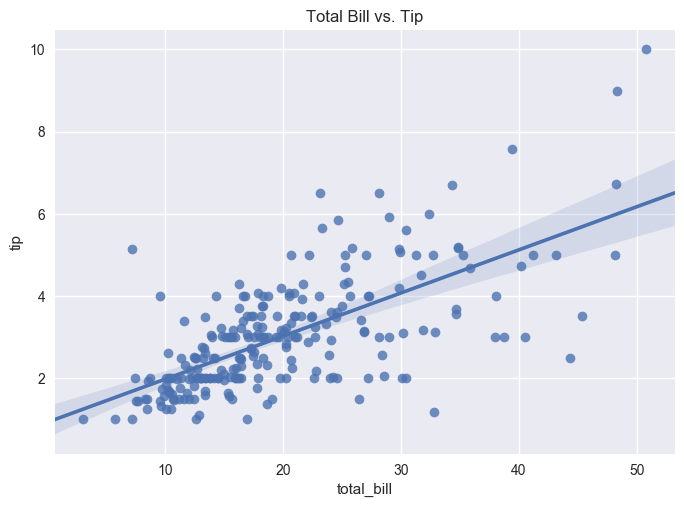

PyObject <matplotlib.text.Text object at 0x32307d3c8>

In [43]:
g = regplot(x="total_bill", y="tip", data=tips)
title("Total Bill vs. Tip") #current active figure PyPlot
# alternatively
# g[:figure][:axes][1][:set_title]("Total Bill vs. Tip")


### One discrete variable:

* Simple scatter plot is not optimal
* Add random noise "jitter" to the points (only on plot) to see their distribution more clearely
* Collapse the observations to the mean along with a confidence interval



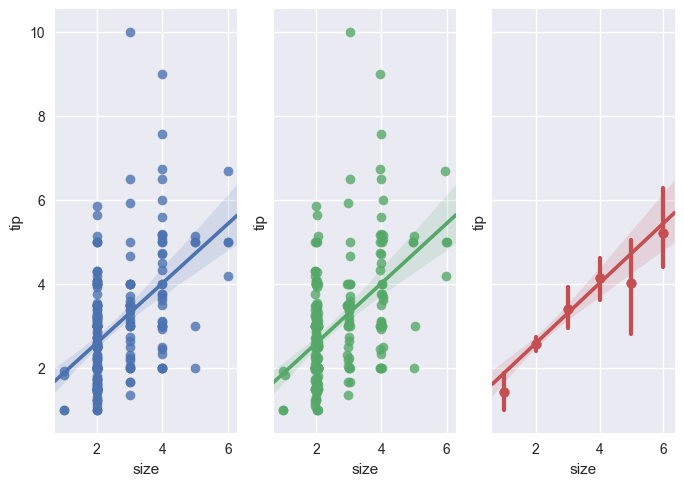

In [4]:
f, (ax1, ax2,ax3)  = subplots(1, 3, sharey=true)
regplot(x="size", y="tip", data=tips, ax=ax1);
regplot(x="size", y="tip", data=tips, x_jitter=.05, ax=ax2);
regplot(x="size", y="tip", data=tips, x_estimator=numpy.mean, ax=ax3);

### Higher order models

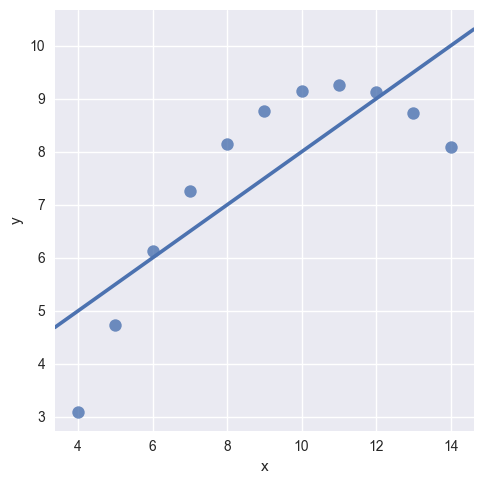

In [5]:
anscombe = load_dataset("anscombe");
head(anscombe)

lmplot(x="x", y="y", data=query(anscombe, "dataset == 'II'"),
           ci=nothing, scatter_kws=Dict("s"=> 80));

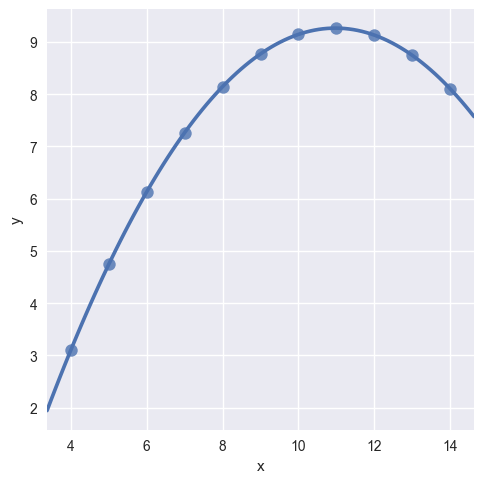

In [6]:
lmplot(x="x", y="y", data=query(anscombe, "dataset == 'II'"),
           ci=nothing, scatter_kws=Dict("s"=> 80), order =2);

### Joint Plot with marginal distributions

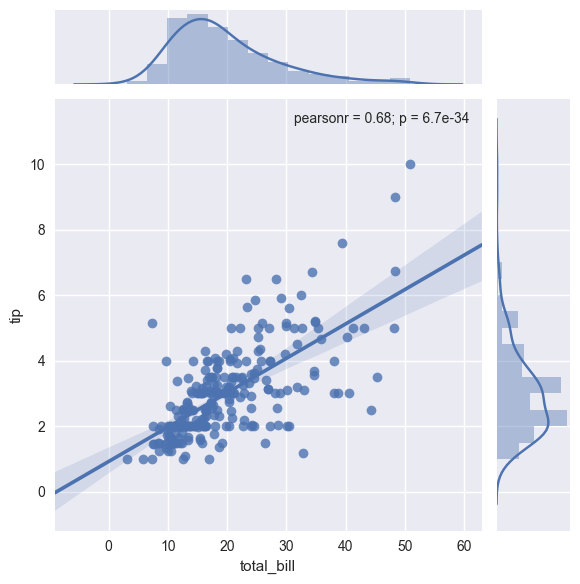

In [44]:
jointplot(x="total_bill", y="tip", data=tips, kind="reg")
savefig("./test.svg")

## Conditioning on another variable

* Must use `lmplot` instead of `regplot`

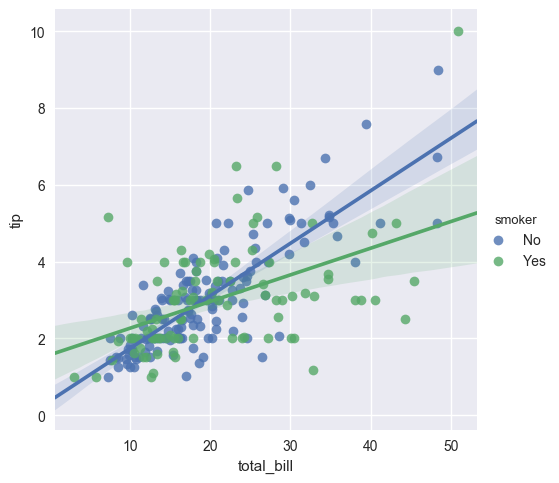

In [8]:
lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

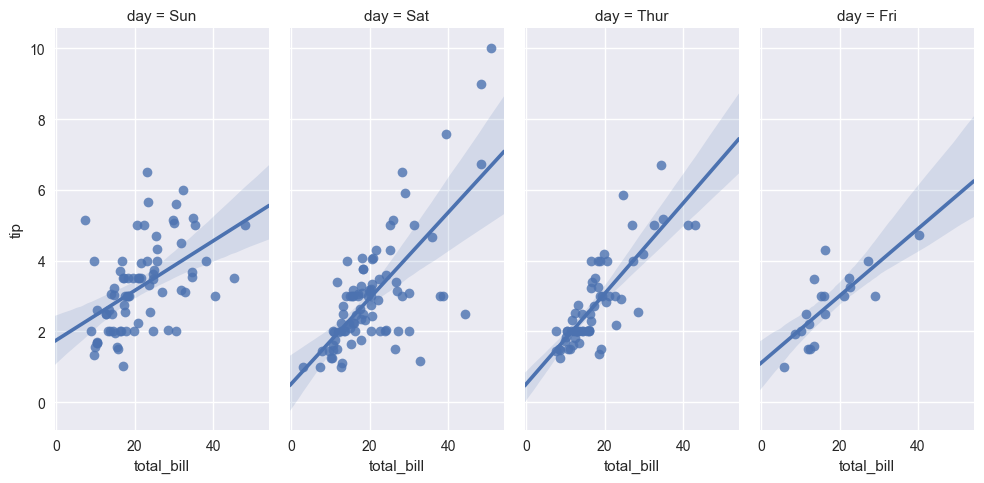

In [9]:
lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

### If Seaborn is working, let's keep exploring:

* [Distributions](http://seaborn.pydata.org/tutorial/distributions.html#distribution-tutorial)
* [Categorical Variables](http://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial)